In [1]:
from langgraph.graph import StateGraph,START,END
# from langchain.chat_models import init_chat_model
from typing import TypedDict
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

In [2]:
load_dotenv()

True

In [3]:
def create_llm():
    """Create and configure the Gemini LLM."""
    api_key = os.getenv("GOOGLE_API_KEY")
    if not api_key:
        raise ValueError("GOOGLE_API_KEY environment variable is not set")
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-1.5-flash",  # Using the more accessible model
        temperature=0.7,  # Controls creativity (0.0 = deterministic, 1.0 = very creative)
        google_api_key=api_key,
        convert_system_message_to_human=True  # Helps with compatibility
    )
    return llm

In [4]:
model = create_llm()

In [11]:
model.invoke("hello").content

c:\Users\karan\OneDrive - Nitte Meenakshi Institute Of Technology\LangGraph_tutorial\langgrapgenv\Lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'Hello there! How can I help you today?'

In [5]:
# create state

class inpdata(TypedDict):
    ques:str
    ans:str

In [21]:
def questionbot(state:inpdata)->inpdata:

    # Extract question
    ques=state['ques']

    # create prompt
    prompt=f"Answer the question in a concise manner.{ques}"

    # get response from model
    answer=model.invoke(prompt).content

    # update answer in state
    state['ans']=answer

    return state

    

In [22]:
# create StateGraph
graph = StateGraph(inpdata)

# add nodes
graph.add_node("Q&A Bot",questionbot)

# add edges
graph.add_edge(START,"Q&A Bot")
graph.add_edge("Q&A Bot",END)

workflow=graph.compile()

In [25]:
# Execute the workflow with an initial question
initial_state={'ques':"What is the Difference between to and two ?"}

final_state=workflow.invoke(initial_state)

print(final_state['ans'])

c:\Users\karan\OneDrive - Nitte Meenakshi Institute Of Technology\LangGraph_tutorial\langgrapgenv\Lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


"To" is a preposition (e.g., "to the store") or part of an infinitive verb (e.g., "to run").  "Two" is a number (2).


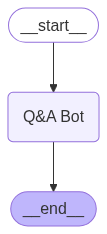

In [19]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass